# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [71]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

display(heroes_df.head())
powers_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [72]:
heroes_df.drop("Unnamed: 0", axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [73]:
display(heroes_df.describe())
powers_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Havok,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

The Weight and Publisher columns contain null values.  Replace null values in Weight column with mean or median value for this column. Since Publisher is a categorical column, having null values here is not necessarily a blocking problem. We can either remove those rows (not desirable, because those rows might be interesting, and we should never throw away data when we can help it), we can leave them as is, or, since it is only 15 values, we could always look it up manually and fill in the correct values. This is not expected for this lab, but would be a good solution if this data was important in a real-world project.


In [74]:
heroes_df.isna().any()

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

In [75]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [76]:
mean_weight = np.mean(heroes_df.Weight)
heroes_df['Weight'].fillna(mean_weight, inplace=True)
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [77]:
powers_df.isna().any()

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
Durability               False
Stealth                  False
Energy Absorption        False
Flight                   False
Danger Sense             False
Underwater breathing     False
Marksmanship             False
Weapons Master           False
Power Augmentation       False
Animal Attributes        False
Longevity                False
Intelligence             False
Super Strength           False
Cryokinesis              False
Telepathy                False
Energy Armor             False
Energy Blasts            False
Duplication              False
Size Changing            False
Density Control          False
Stamina                  False
Astral Travel            False
Audio Control            False
Dexterity                False
                         ...  
Intuitive aptitude       False
Vision -

In [78]:
# Let's check if any of these are True, rather than reading them all, by 
# just chaining another call to .any()
powers_df.isna().any().any()

False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [79]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

In [80]:
powers_df  = powers_df.astype('str')  

In [81]:
powers_df.dtypes 

name                     object
Agility                  object
Accelerated Healing      object
Lantern Power Ring       object
Dimensional Awareness    object
Cold Resistance          object
Durability               object
Stealth                  object
Energy Absorption        object
Flight                   object
Danger Sense             object
Underwater breathing     object
Marksmanship             object
Weapons Master           object
Power Augmentation       object
Animal Attributes        object
Longevity                object
Intelligence             object
Super Strength           object
Cryokinesis              object
Telepathy                object
Energy Armor             object
Energy Blasts            object
Duplication              object
Size Changing            object
Density Control          object
Stamina                  object
Astral Travel            object
Audio Control            object
Dexterity                object
                          ...  
Intuitiv

In [82]:
heroes_and_powers_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [83]:
heroes_and_powers_df.isna().sum()

Agility                   0
Accelerated Healing       0
Lantern Power Ring        0
Dimensional Awareness     0
Cold Resistance           0
Durability                0
Stealth                   0
Energy Absorption         0
Flight                    0
Danger Sense              0
Underwater breathing      0
Marksmanship              0
Weapons Master            0
Power Augmentation        0
Animal Attributes         0
Longevity                 0
Intelligence              0
Super Strength            0
Cryokinesis               0
Telepathy                 0
Energy Armor              0
Energy Blasts             0
Duplication               0
Size Changing             0
Density Control           0
Stamina                   0
Astral Travel             0
Audio Control             0
Dexterity                 0
Omnitrix                  0
                         ..
Matter Absorption         0
The Force                 0
Resurrection              0
Terrakinesis              0
Vision - Heat       

In [84]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']


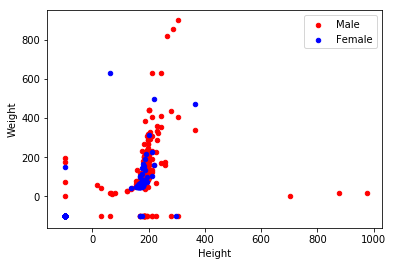

In [85]:
ax = plt.subplot(1,1,1)
male_heroes_df.plot(kind = 'scatter', x= 'Height', y='Weight', color='r', ax=ax, label="Male")
female_heroes_df.plot(kind = 'scatter', x= 'Height', y='Weight', color='b', ax=ax, label='Female')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [86]:
# subset male and female heroes into different dataframes
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']


In [87]:
male_heroes_df.head()
male_heroes_df.tail()
female_heroes_df.head()
female_heroes_df.tail()
display(male_heroes_df.describe())
display(female_heroes_df.describe())
display(male_heroes_df.mode(numeric_only=True))
female_heroes_df.mode(numeric_only=True)

,Height,Weight
count,505.000000,505.000000
mean,107.275248,52.035357
std,144.435370,139.075289
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,180.000000,79.000000
75%,188.000000,101.000000
max,975.000000,900.000000


,Height,Weight
count,200.000000,200.000000
mean,98.052500,27.265000
std,124.819341,103.648007
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,168.000000,54.000000
75%,175.000000,61.000000
max,366.000000,630.000000


,Height,Weight
0,-99.0,-99.0


,Height,Weight
0,-99.0,-99.0


In [88]:
def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title("Distribution of {} for {} heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()

/Users/michelekragalott/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


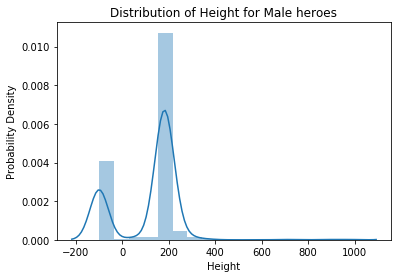

Mean Height for male heroes: 107.27524752475247
Median Height for male heroes: 180.0


In [89]:
# Male Height
show_distplot(heroes_and_powers_df, 'Male', 'Height')
print("Mean Height for male heroes: {}".format(np.mean(male_heroes_df.Height)))
print("Median Height for male heroes: {}".format(np.median(male_heroes_df.Height)))

In [90]:
male_heroes_df['Height'].describe()

count    505.000000
mean     107.275248
std      144.435370
min      -99.000000
25%      -99.000000
50%      180.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64

/Users/michelekragalott/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


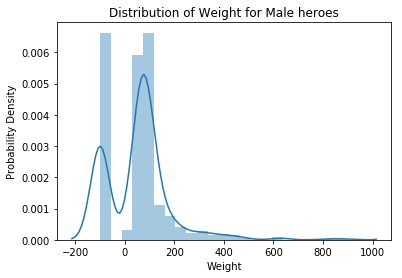

Mean weight for male heroes: 52.03535681436996
Median weight for male heroes: 79.0


In [91]:
# Male Weight
show_distplot(heroes_and_powers_df, 'Male', 'Weight')
print("Mean weight for male heroes: {}".format(np.mean(male_heroes_df.Weight)))
print("Median weight for male heroes: {}".format(np.median(male_heroes_df.Weight)))


/Users/michelekragalott/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


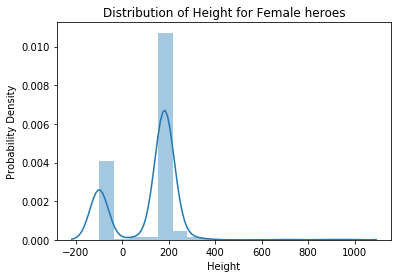

Mean height for female heroes: 98.0525
Median height for female heroes: 168.0


In [92]:
# Female Height
show_distplot(heroes_and_powers_df, 'Female', 'Height')
print("Mean height for female heroes: {}".format(np.mean(female_heroes_df.Height)))
print("Median height for female heroes: {}".format(np.median(female_heroes_df.Height)))


/Users/michelekragalott/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


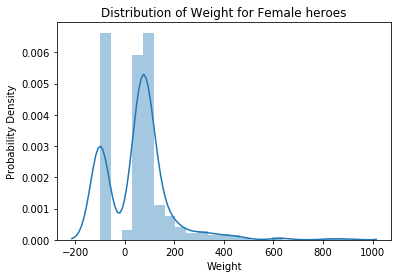

Mean weight for female heroes: 27.265
Median weight for female heroes: 54.0


In [93]:
# Female Weight
show_distplot(heroes_and_powers_df, 'Female', 'Weight')
print("Mean weight for female heroes: {}".format(np.mean(female_heroes_df.Weight)))
print("Median weight for female heroes: {}".format(np.median(female_heroes_df.Weight)))


Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________
Every single distribution is bimodal, and each contains huge outliers. Strong variability in each distribution. Student should do more than just plot these, since they'll need to access the mean and median for each distribution as well. Student should also consider comparing the descriptive statistics from each distribution.

Ideally, students should comment on the outliers that fall below 0 for the height and weight. Further investigation demonstrates that all heights and weights below zero are set to -99, which suggests that these may have originally been missing values which were filled with an erroneous value. This investigation and subsequent plots with these values removed is demonstrated below.


In [94]:
print('Top Negative Heights:')
print(heroes_df[heroes_df.Height < 0].Height.value_counts())

print('Top Negative Weights:')
print(heroes_df[heroes_df.Weight < 0].Weight.value_counts())

Top Negative Heights:
-99.0    217
Name: Height, dtype: int64
Top Negative Weights:
-99.0    237
Name: Weight, dtype: int64


/Users/michelekragalott/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


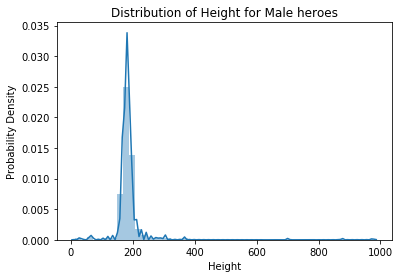

Mean Height for Male heroes: 192.4622093023256
Median Height for Male heroes: 185.0


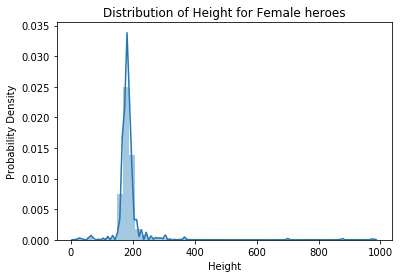

Mean Height for Female heroes: 174.74817518248176
Median Height for Female heroes: 170.0


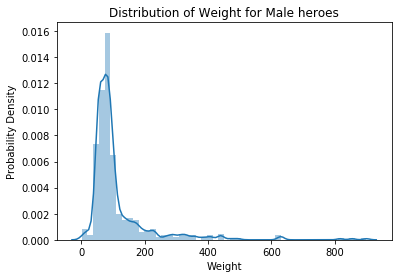

Mean Weight for Male heroes: 126.24802205907002
Median Weight for Male heroes: 90.0


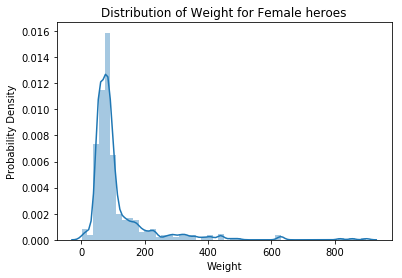

Mean Weight for Female heroes: 79.85925925925926
Median Weight for Female heroes: 58.0


In [95]:
for feat in ['Height', 'Weight']:
    df = heroes_and_powers_df[heroes_and_powers_df[feat]>0] #Temporarily remove negatives
    for group in ['Male', 'Female']:
        show_distplot(df, group, feat)
        print("Mean {} for {} heroes: {}".format(feat, group, df[df['Gender']==group][feat].mean()))
        print("Median {} for {} heroes: {}".format(feat, group, df[df['Gender']==group][feat].median()))

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [96]:
# What are the 5 most common powers overall?
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({"True": 1, "False": 0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5] 
    
overall_top_5 = top_5_powers(heroes_and_powers_df)
marvel_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'Marvel Comics']
dc_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'DC Comics']
print(overall_top_5)   

[('Super Strength', 362), ('Stamina', 294), ('Durability', 262), ('Super Speed', 251), ('Agility', 244)]


In [97]:
marvel_top_5 = top_5_powers(marvel_df)
print(marvel_top_5)

[('Super Strength', 204), ('Durability', 154), ('Stamina', 150), ('Super Speed', 137), ('Agility', 126)]


In [98]:
dc_top_5 = top_5_powers(dc_df)
print(dc_top_5)

[('Super Strength', 109), ('Stamina', 90), ('Flight', 86), ('Super Speed', 79), ('Agility', 71)]


In [99]:
# exploring data set with values, value_counts, slicing -my work

In [100]:
heroes_df.columns.values[1:]

array(['Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher',
       'Skin color', 'Alignment', 'Weight'], dtype=object)

In [101]:
df=heroes_and_powers_df.drop(heroes_df.columns.values[1:], axis=1)
df.columns.values


array(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability',
       'Stealth', 'Energy Absorption', 'Flight', 'Danger Sense',
       'Underwater breathing', 'Marksmanship', 'Weapons Master',
       'Power Augmentation', 'Animal Attributes', 'Longevity',
       'Intelligence', 'Super Strength', 'Cryokinesis', 'Telepathy',
       'Energy Armor', 'Energy Blasts', 'Duplication', 'Size Changing',
       'Density Control', 'Stamina', 'Astral Travel', 'Audio Control',
       'Dexterity', 'Omnitrix', 'Super Speed', 'Possession',
       'Animal Oriented Powers', 'Weapon-based Powers', 'Electrokinesis',
       'Darkforce Manipulation', 'Death Touch', 'Teleportation',
       'Enhanced Senses', 'Telekinesis', 'Energy Beams', 'Magic',
       'Hyperkinesis', 'Jump', 'Clairvoyance', 'Dimensional Travel',
       'Power Sense', 'Shapeshifting', 'Peak Human Condition',
       'Immortality', 'Camouflage', 'Element Control', 'Phasing',
   

In [105]:
columns =df.columns.values
for col in columns:
   df[col] = df[col].map({"True": 1, "False": 0})
   
#    print(df[col])
   power_counts_dict = dict(df.sum()) 
print(power_counts_dict)
print(sorted(power_counts_dict.items(), key=lambda x:[1], reverse=True)[:5])

{'Agility': 244, 'Accelerated Healing': 181, 'Lantern Power Ring': 11, 'Dimensional Awareness': 25, 'Cold Resistance': 49, 'Durability': 262, 'Stealth': 132, 'Energy Absorption': 77, 'Flight': 212, 'Danger Sense': 34, 'Underwater breathing': 23, 'Marksmanship': 124, 'Weapons Master': 107, 'Power Augmentation': 8, 'Animal Attributes': 26, 'Longevity': 116, 'Intelligence': 158, 'Super Strength': 362, 'Cryokinesis': 20, 'Telepathy': 92, 'Energy Armor': 8, 'Energy Blasts': 148, 'Duplication': 17, 'Size Changing': 55, 'Density Control': 15, 'Stamina': 294, 'Astral Travel': 4, 'Audio Control': 8, 'Dexterity': 6, 'Omnitrix': 1, 'Super Speed': 251, 'Possession': 7, 'Animal Oriented Powers': 41, 'Weapon-based Powers': 62, 'Electrokinesis': 20, 'Darkforce Manipulation': 9, 'Death Touch': 7, 'Teleportation': 70, 'Enhanced Senses': 91, 'Telekinesis': 61, 'Energy Beams': 42, 'Magic': 44, 'Hyperkinesis': 1, 'Jump': 66, 'Clairvoyance': 5, 'Dimensional Travel': 23, 'Power Sense': 3, 'Shapeshifting': 6

In [106]:
display(heroes_and_powers_df['Height'].value_counts())
heroes_and_powers_df['Weight'].value_counts()

-99.0     170
 183.0     58
 188.0     47
 180.0     37
 185.0     35
 178.0     35
 175.0     32
 168.0     28
 165.0     26
 170.0     22
 193.0     20
 191.0     18
 198.0     18
 173.0     16
 201.0     10
 196.0     10
 163.0      8
 213.0      7
 203.0      5
 157.0      5
 244.0      4
 211.0      4
 229.0      3
 155.0      3
 218.0      3
 226.0      3
 206.0      2
 279.0      2
 366.0      2
 137.0      2
 305.0      2
 30.5       2
 122.0      2
 61.0       1
 975.0      1
 142.0      1
 297.0      1
 267.0      1
 304.8      1
 701.0      1
 876.0      1
 259.0      1
 15.2       1
 287.0      1
 62.5       1
 257.0      1
 66.0       1
 160.0      1
 234.0      1
 71.0       1
 108.0      1
 64.0       1
Name: Height, dtype: int64

-99.0     190
 81.0      22
 79.0      21
 54.0      20
 90.0      19
 86.0      15
 52.0      15
 59.0      14
 77.0      13
 56.0      13
 50.0      12
 101.0     12
 88.0      11
 63.0      11
 61.0      11
 74.0      10
 83.0      10
 95.0       9
 72.0       7
 97.0       7
 99.0       7
 57.0       7
 68.0       7
 104.0      7
 65.0       7
 135.0      7
 55.0       5
 70.0       5
 158.0      5
 58.0       5
         ... 
 14.0       1
 473.0      1
 356.0      1
 324.0      1
 360.0      1
 69.0       1
 236.0      1
 36.0       1
 140.0      1
 128.0      1
 268.0      1
 45.0       1
 214.0      1
 234.0      1
 105.0      1
 76.0       1
 198.0      1
 116.0      1
 170.0      1
 176.0      1
 27.0       1
 47.0       1
 178.0      1
 132.0      1
 25.0       1
 38.0       1
 412.0      1
 320.0      1
 96.0       1
 855.0      1
Name: Weight, Length: 133, dtype: int64

In [107]:
shapeshifting= heroes_and_powers_df[heroes_and_powers_df['Shapeshifting']=='True']
shapeshifting[['Shapeshifting', 'Weight', 'Height']]


,Shapeshifting,Weight,Height
name,,,
Alex Mercer,True,-99.0,-99.0
Amazo,True,173.0,257.0
Anti-Venom,True,358.0,229.0
Apocalypse,True,135.0,213.0
Azazel,True,67.0,183.0
Beast Boy,True,68.0,173.0
Ben 10,True,-99.0,-99.0
Beyonder,True,-99.0,-99.0
Bloodhawk,True,-99.0,-99.0


In [108]:
shapeshifting[['Height','Weight']].groupby('Height').count()

,Weight
Height,
-99.0,16
71.0,1
157.0,1
168.0,3
170.0,1
173.0,1
175.0,6
178.0,3
180.0,1


In [109]:
display(shapeshifting['Weight'].value_counts())
shapeshifting['Height'].value_counts()


# above exploring dataset---my work


-99.0     18
 54.0      3
 67.0      2
 90.0      2
 80.0      2
 81.0      2
 50.0      2
 135.0     2
 117.0     2
 68.0      1
 86.0      1
 77.0      1
 358.0     1
 104.0     1
 56.0      1
 173.0     1
 18.0      1
 91.0      1
 99.0      1
 62.0      1
 58.0      1
 473.0     1
 119.0     1
 49.0      1
 73.0      1
 97.0      1
 149.0     1
 146.0     1
 47.0      1
 405.0     1
 203.0     1
 63.0      1
 293.0     1
 128.0     1
 61.0      1
 140.0     1
 236.0     1
 59.0      1
 14.0      1
Name: Weight, dtype: int64

-99.0     16
 185.0     7
 175.0     6
 196.0     4
 183.0     4
 188.0     4
 178.0     3
 168.0     3
 191.0     2
 180.0     1
 257.0     1
 229.0     1
 213.0     1
 211.0     1
 173.0     1
 157.0     1
 206.0     1
 279.0     1
 198.0     1
 975.0     1
 170.0     1
 71.0      1
 193.0     1
 201.0     1
 366.0     1
Name: Height, dtype: int64

<Figure size 432x288 with 0 Axes>

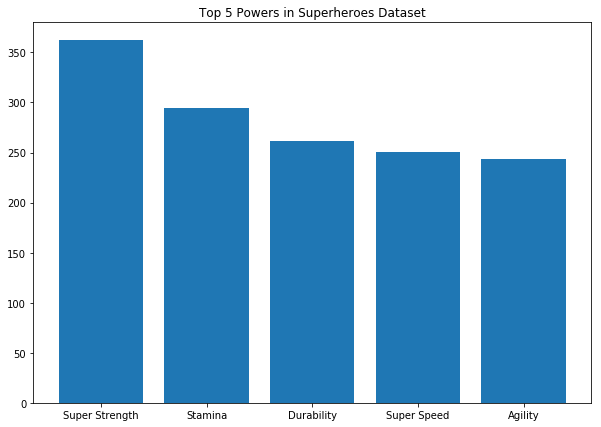

None

<Figure size 432x288 with 0 Axes>

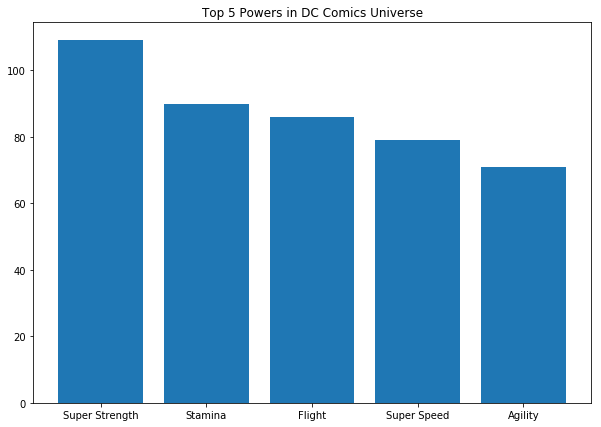

None

<Figure size 432x288 with 0 Axes>

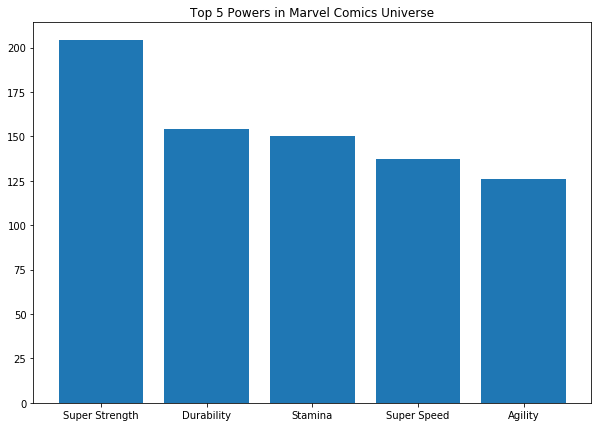

In [110]:
def top_5_bar_chart(top_5_list, publisher=None):
    powers = [i[0] for i in top_5_list]
    values = [i[1] for i in top_5_list]
    plt.clf()
    plt.figure(figsize=(10, 7))
    plt.bar(powers, values)
    if publisher:
        plt.title("Top 5 Powers in {} Universe".format(publisher))
    else:
        plt.title("Top 5 Powers in Superheroes Dataset")
    plt.show()

display(top_5_bar_chart(overall_top_5))
display(top_5_bar_chart(dc_top_5, publisher="DC Comics"))
top_5_bar_chart(marvel_top_5, publisher="Marvel Comics")    
   

In [111]:
marvel_powers = [i[0] for i in overall_top_5]
print(marvel_powers)
marvel_values = [i[1] for i in overall_top_5]
print(marvel_values)

['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility']
[362, 294, 262, 251, 244]


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
_________________________________________________________________________Marvel vs DC comics- very similar in top powers and both follow trends of the Superhero dataset________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [112]:

df=heroes_and_powers_df.drop(heroes_df.columns.values[1:], axis=1)
columns = df.columns.values

for col in columns:
     df[col] = df[col].map({"True": 1, "False": 0})

        
     
        
    

     
matrix=[]
for name, values in df.iteritems():
    matrix.append(pd.DataFrame(df.groupby(name, as_index='False').apply(lambda x: x[x == 1].count())).values.tolist()[1])
pd.DataFrame(matrix)




,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,244,106,5,11,27,119,99,33,76,30,...,13,9,2,8,1,1,0,1,1,1
1,106,181,2,14,25,108,47,36,76,26,...,15,10,2,9,1,0,1,1,2,2
2,5,2,11,0,0,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
3,11,14,0,25,0,7,7,8,16,2,...,1,11,0,1,0,0,0,0,2,2
4,27,25,0,0,49,42,13,9,13,3,...,0,1,0,1,0,0,0,0,0,0
5,119,108,4,7,42,262,57,42,99,23,...,14,4,2,9,0,0,1,1,1,1
6,99,47,0,7,13,57,132,7,23,19,...,10,5,1,5,0,0,0,0,0,0
7,33,36,0,8,9,42,7,77,50,6,...,0,6,1,0,1,1,1,1,2,2
8,76,76,9,16,13,99,23,50,212,6,...,1,11,1,3,1,0,1,1,1,1
9,30,26,0,2,3,23,19,6,6,34,...,13,1,0,8,0,0,0,0,1,1


In [121]:
occurances=pd.DataFrame(matrix)



## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data